In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [4]:
train_dir = "../datasets/train/"
test_dir = "../datasets/test/"

import os
print(f"Train directory exists: {os.path.isdir(train_dir)}")
print(f"Test directory exists: {os.path.isdir(test_dir)}")

Train directory exists: True
Test directory exists: True


In [5]:
row, col = 48, 48
classes = 2

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

          0     1
train  7215  4830
         0     1
test  1774  1247


<Axes: >

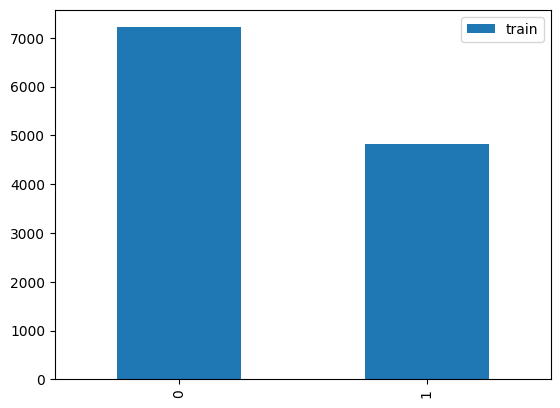

In [5]:
train_count.transpose().plot(kind='bar')

<Axes: >

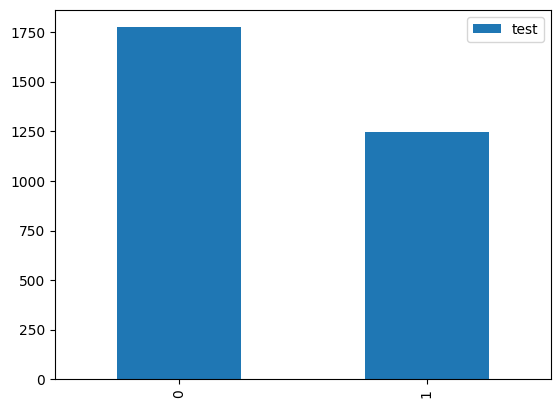

In [6]:
test_count.transpose().plot(kind='bar')

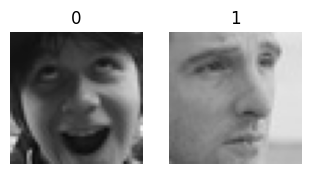

In [6]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    rescale = 1./255,
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

Found 9636 images belonging to 2 classes.
Found 2409 images belonging to 2 classes.


In [10]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.models import Sequential
import tensorflow as tf

from tensorflow.keras.regularizers import l2

# Define the model architecture with L2 regularization
model = Sequential()

# Add a convolutional layer with L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


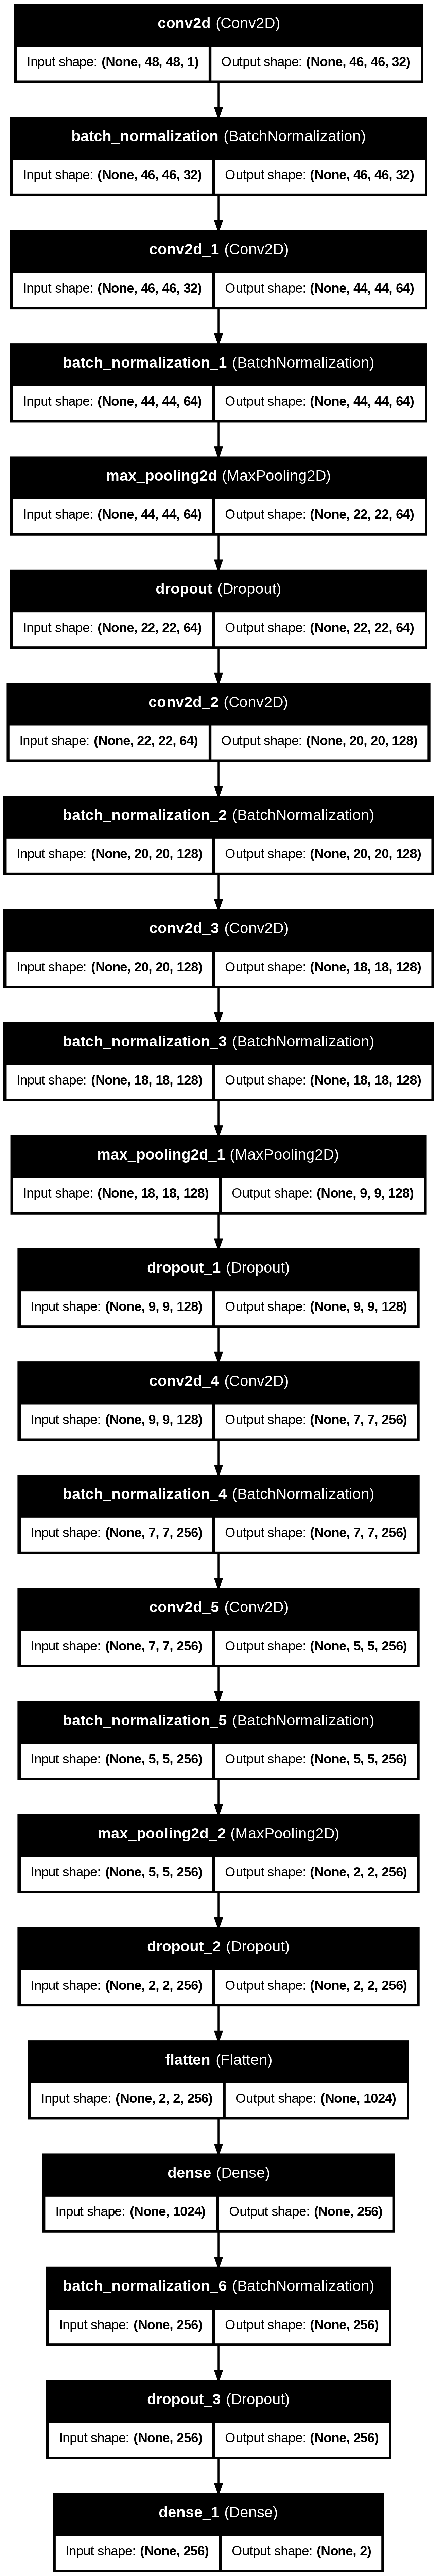

In [11]:
# Plot the model and save the image
plot_model(model, to_file='FER_baseline.png', show_shapes=True, show_layer_names=True)

In [12]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,392,898 (5.31 MB)

 Trainable params: 1,390,658 (5.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='face_emotion_detection_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

tf.debugging.set_log_device_placement(True)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5355 - loss: 11.9968
Epoch 1: val_accuracy improved from -inf to 0.59900, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 36s 137ms/step - accuracy: 0.5357 - loss: 11.9940 - val_accuracy: 0.5990 - val_loss: 11.0283
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5894 - loss: 11.1615
Epoch 2: val_accuracy improved from 0.59900 to 0.59942, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.5894 - loss: 11.1606 - val_accuracy: 0.5994 - val_loss: 10.5014
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6051 - loss: 10.5506
Epoch 3: val_accuracy improved from 0.59942 to 0.60606, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.6051 - loss: 10.5497 - val_accuracy: 0.6061 - val_loss: 10.0272
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6240 - loss: 10.0350
Epoch 4: val_accuracy improved from 0.60606 to 0.65048, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6241 - loss: 10.0342 - val_accuracy: 0.6505 - val_loss: 9.4938
Epoch 5/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6483 - loss: 9.5286
Epoch 5: val_accuracy improved from 0.65048 to 0.66293, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.6484 - loss: 9.5271 - val_accuracy: 0.6629 - val_loss: 9.0561
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6512 - loss: 9.0697
Epoch 6: val_accuracy improved from 0.66293 to 0.72976, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.6513 - loss: 9.0689 - val_accuracy: 0.7298 - val_loss: 8.5243
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6759 - loss: 8.6174
Epoch 7: val_accuracy did not improve from 0.72976
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6760 - loss: 8.6166 - val_accuracy: 0.7223 - val_loss: 8.1503
Epoch 8/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7014 - loss: 8.1671
Epoch 8: val_accuracy improved from 0.72976 to 0.73308, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.7014 - loss: 8.1657 - val_accuracy: 0.7331 - val_loss: 7.7236
Epoch 9/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6994 - loss: 7.7714
Epoch 9: val_accuracy improved from 0.73308 to 0.74678, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.6995 - loss: 7.7706 - val_accuracy: 0.7468 - val_loss: 7.3335
Epoch 10/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7090 - loss: 7.3716
Epoch 10: val_accuracy improved from 0.74678 to 0.75509, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7090 - loss: 7.3709 - val_accuracy: 0.7551 - val_loss: 6.9709
Epoch 11/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7197 - loss: 6.9521
Epoch 11: val_accuracy did not improve from 0.75509
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7198 - loss: 6.9514 - val_accuracy: 0.7468 - val_loss: 6.6230
Epoch 12/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7355 - loss: 6.5744
Epoch 12: val_accuracy improved from 0.75509 to 0.76920, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7355 - loss: 6.5732 - val_accuracy: 0.7692 - val_loss: 6.2198
Epoch 13/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7444 - loss: 6.2031
Epoch 13: val_accuracy improved from 0.76920 to 0.77003, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7444 - loss: 6.2020 - val_accuracy: 0.7700 - val_loss: 5.8833
Epoch 14/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7578 - loss: 5.8401
Epoch 14: val_accuracy improved from 0.77003 to 0.79245, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.7578 - loss: 5.8395 - val_accuracy: 0.7924 - val_loss: 5.5173
Epoch 15/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7681 - loss: 5.5038
Epoch 15: val_accuracy improved from 0.79245 to 0.80282, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.7681 - loss: 5.5033 - val_accuracy: 0.8028 - val_loss: 5.1826
Epoch 16/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7636 - loss: 5.1697
Epoch 16: val_accuracy did not improve from 0.80282
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7637 - loss: 5.1686 - val_accuracy: 0.7991 - val_loss: 4.8700
Epoch 17/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7818 - loss: 4.8342
Epoch 17: val_accuracy did not improve from 0.80282
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7819 - loss: 4.8331 - val_accuracy: 0.8016 - val_loss: 4.5885
Epoch 18/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8029 - loss: 4.5157
Epoch 18: val_accuracy did not improve from 0.80282
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8029 - loss: 4.5153 - val_accuracy: 0.7958 - val_loss: 4.3123
Epoch 19/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8141 - loss: 4.2101
Epoch 19: val_ac

151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8140 - loss: 4.2093 - val_accuracy: 0.8074 - val_loss: 4.0347
Epoch 20/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8072 - loss: 3.9363
Epoch 20: val_accuracy improved from 0.80739 to 0.82399, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.8072 - loss: 3.9355 - val_accuracy: 0.8240 - val_loss: 3.7278
Epoch 21/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8183 - loss: 3.6635
Epoch 21: val_accuracy improved from 0.82399 to 0.82524, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8183 - loss: 3.6631 - val_accuracy: 0.8252 - val_loss: 3.4657
Epoch 22/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8300 - loss: 3.4032
Epoch 22: val_accuracy did not improve from 0.82524
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.8300 - loss: 3.4025 - val_accuracy: 0.8236 - val_loss: 3.2491
Epoch 23/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8348 - loss: 3.1625
Epoch 23: val_accuracy improved from 0.82524 to 0.83852, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8348 - loss: 3.1619 - val_accuracy: 0.8385 - val_loss: 3.0107
Epoch 24/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8387 - loss: 2.9389
Epoch 24: val_accuracy improved from 0.83852 to 0.84641, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.8387 - loss: 2.9385 - val_accuracy: 0.8464 - val_loss: 2.7650
Epoch 25/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8508 - loss: 2.7121
Epoch 25: val_accuracy did not improve from 0.84641
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8508 - loss: 2.7115 - val_accuracy: 0.8398 - val_loss: 2.5905
Epoch 26/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8605 - loss: 2.5113
Epoch 26: val_accuracy improved from 0.84641 to 0.85845, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8605 - loss: 2.5110 - val_accuracy: 0.8584 - val_loss: 2.3883
Epoch 27/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8603 - loss: 2.3200
Epoch 27: val_accuracy improved from 0.85845 to 0.86177, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.8603 - loss: 2.3198 - val_accuracy: 0.8618 - val_loss: 2.2061
Epoch 28/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8653 - loss: 2.1620
Epoch 28: val_accuracy improved from 0.86177 to 0.87256, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8653 - loss: 2.1614 - val_accuracy: 0.8726 - val_loss: 2.0226
Epoch 29/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8737 - loss: 1.9871
Epoch 29: val_accuracy did not improve from 0.87256
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8737 - loss: 1.9867 - val_accuracy: 0.8705 - val_loss: 1.8831
Epoch 30/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8763 - loss: 1.8441
Epoch 30: val_accuracy improved from 0.87256 to 0.87422, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8763 - loss: 1.8439 - val_accuracy: 0.8742 - val_loss: 1.7379
Epoch 31/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8716 - loss: 1.7150
Epoch 31: val_accuracy did not improve from 0.87422
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8716 - loss: 1.7148 - val_accuracy: 0.8497 - val_loss: 1.6647
Epoch 32/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8757 - loss: 1.6008
Epoch 32: val_accuracy improved from 0.87422 to 0.87920, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8757 - loss: 1.6006 - val_accuracy: 0.8792 - val_loss: 1.5205
Epoch 33/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8907 - loss: 1.4650
Epoch 33: val_accuracy did not improve from 0.87920
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8907 - loss: 1.4649 - val_accuracy: 0.8614 - val_loss: 1.4502
Epoch 34/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8808 - loss: 1.3794
Epoch 34: val_accuracy did not improve from 0.87920
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.8808 - loss: 1.3792 - val_accuracy: 0.8730 - val_loss: 1.3321
Epoch 35/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8895 - loss: 1.2799
Epoch 35: val_accuracy improved from 0.87920 to 0.89249, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8895 - loss: 1.2797 - val_accuracy: 0.8925 - val_loss: 1.2210
Epoch 36/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8941 - loss: 1.1882
Epoch 36: val_accuracy did not improve from 0.89249
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8940 - loss: 1.1881 - val_accuracy: 0.8850 - val_loss: 1.1614
Epoch 37/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8920 - loss: 1.1220
Epoch 37: val_accuracy did not improve from 0.89249
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8920 - loss: 1.1218 - val_accuracy: 0.8921 - val_loss: 1.0789
Epoch 38/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8968 - loss: 1.0511
Epoch 38: val_accuracy did not improve from 0.89249
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8969 - loss: 1.0509 - val_accuracy: 0.8796 - val_loss: 1.0507
Epoch 39/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9064 - loss: 0.9851
Epoch 39: val_ac

151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9063 - loss: 0.9850 - val_accuracy: 0.8929 - val_loss: 0.9635
Epoch 40/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9029 - loss: 0.9310
Epoch 40: val_accuracy did not improve from 0.89290
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9028 - loss: 0.9310 - val_accuracy: 0.8858 - val_loss: 0.9269
Epoch 41/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9032 - loss: 0.8838
Epoch 41: val_accuracy did not improve from 0.89290
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9032 - loss: 0.8838 - val_accuracy: 0.8904 - val_loss: 0.8896
Epoch 42/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9069 - loss: 0.8422
Epoch 42: val_accuracy did not improve from 0.89290
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9069 - loss: 0.8422 - val_accuracy: 0.8485 - val_loss: 0.9572
Epoch 43/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9051 - loss: 0.8088
Epoch 43: val_

151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9145 - loss: 0.6814 - val_accuracy: 0.9128 - val_loss: 0.6813
Epoch 48/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9212 - loss: 0.6510
Epoch 48: val_accuracy did not improve from 0.91283
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9211 - loss: 0.6510 - val_accuracy: 0.8975 - val_loss: 0.6840
Epoch 49/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9182 - loss: 0.6387
Epoch 49: val_accuracy did not improve from 0.91283
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9182 - loss: 0.6386 - val_accuracy: 0.9074 - val_loss: 0.6590
Epoch 50/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9183 - loss: 0.6212
Epoch 50: val_accuracy did not improve from 0.91283
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9183 - loss: 0.6212 - val_accuracy: 0.8946 - val_loss: 0.6905
Epoch 51/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9224 - loss: 0.5850
Epoch 51: val_ac

151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9307 - loss: 0.5122 - val_accuracy: 0.9145 - val_loss: 0.5476
Epoch 58/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9261 - loss: 0.5192
Epoch 58: val_accuracy did not improve from 0.91449
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9261 - loss: 0.5192 - val_accuracy: 0.9128 - val_loss: 0.5390
Epoch 59/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9261 - loss: 0.4990
Epoch 59: val_accuracy did not improve from 0.91449
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9261 - loss: 0.4990 - val_accuracy: 0.9083 - val_loss: 0.5591
Epoch 60/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9274 - loss: 0.4926
Epoch 60: val_accuracy did not improve from 0.91449
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9274 - loss: 0.4926 - val_accuracy: 0.9066 - val_loss: 0.5333
Epoch 61/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9375 - loss: 0.4699
Epoch 61: val_ac

151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9476 - loss: 0.3986 - val_accuracy: 0.9166 - val_loss: 0.4811
Epoch 73/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9409 - loss: 0.4226
Epoch 73: val_accuracy did not improve from 0.91656
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9409 - loss: 0.4225 - val_accuracy: 0.9000 - val_loss: 0.5230
Epoch 74/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9424 - loss: 0.4066
Epoch 74: val_accuracy did not improve from 0.91656
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9424 - loss: 0.4066 - val_accuracy: 0.9116 - val_loss: 0.4841
Epoch 75/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9485 - loss: 0.3955
Epoch 75: val_accuracy did not improve from 0.91656
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9484 - loss: 0.3955 - val_accuracy: 0.9099 - val_loss: 0.4998
Epoch 76/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9438 - loss: 0.3973
Epoch 76: val_ac

151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9457 - loss: 0.3721 - val_accuracy: 0.9174 - val_loss: 0.4554
Epoch 86/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9461 - loss: 0.3761
Epoch 86: val_accuracy improved from 0.91739 to 0.91947, saving model to face_emotion_detection_model.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9461 - loss: 0.3761 - val_accuracy: 0.9195 - val_loss: 0.4615
Epoch 87/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9513 - loss: 0.3520
Epoch 87: val_accuracy did not improve from 0.91947
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9513 - loss: 0.3521 - val_accuracy: 0.9116 - val_loss: 0.4746
Epoch 88/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9495 - loss: 0.3611
Epoch 88: val_accuracy did not improve from 0.91947
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9495 - loss: 0.3612 - val_accuracy: 0.9041 - val_loss: 0.4914
Epoch 89/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9499 - loss: 0.3608
Epoch 89: val_accuracy did not improve from 0.91947
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9499 - loss: 0.3608 - val_accuracy: 0.9182 - val_loss: 0.4509
Epoch 90/100
150/151 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9490 - loss: 0.3603
Epoch 90: val_ac

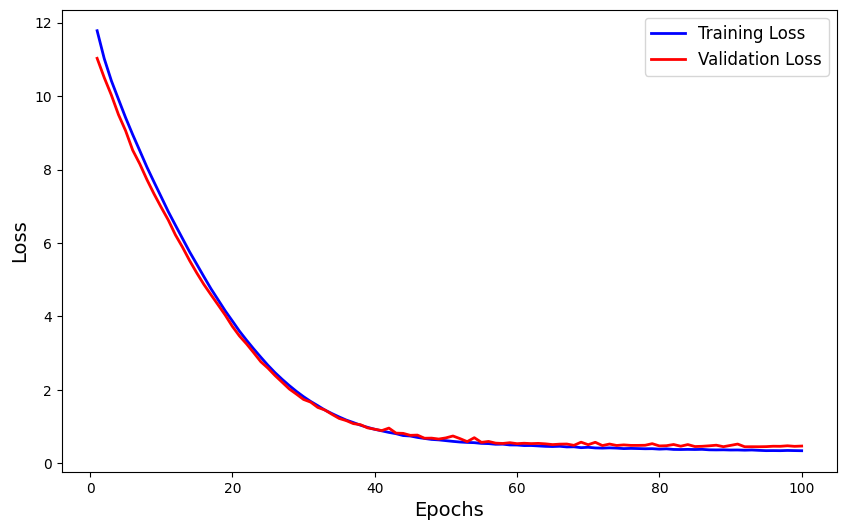

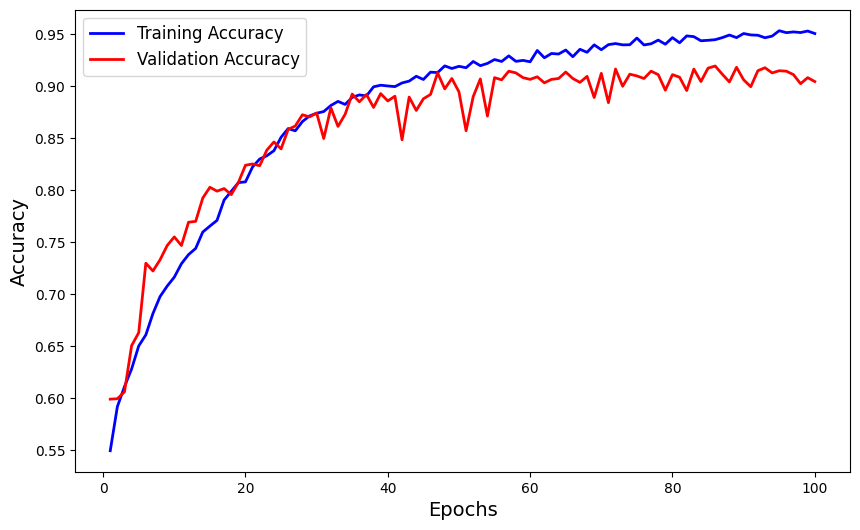

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6), facecolor='white')  
ax = plt.gca()  
ax.set_facecolor('white')  

ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2, markersize=6)
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.show()


plt.figure(figsize=(10, 6), facecolor='white')  
ax = plt.gca()  
ax.set_facecolor('white')  

ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,      
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False            
)

from tensorflow.keras.models import load_model

model = load_model('../models/face_emotion_detection_model.h5')

#evaluate
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 3021 images belonging to 2 classes.


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9252 - loss: 0.4615
Test Accuracy: 92.52%
Test Loss: 0.4615


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# Step 1: Get model predictions
y_pred_prob = model.predict(test_generator)  
y_pred = np.argmax(y_pred_prob, axis=1)      

# Step 2: Get true labels
y_true = test_generator.classes  

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 4: Compute classification report (precision, recall, f1-score)
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)
print("\nClassification Report:")
print(report)


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step
Confusion Matrix:
[[1643  131]
 [  95 1152]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1774
           1       0.90      0.92      0.91      1247

    accuracy                           0.93      3021
   macro avg       0.92      0.92      0.92      3021
weighted avg       0.93      0.93      0.93      3021



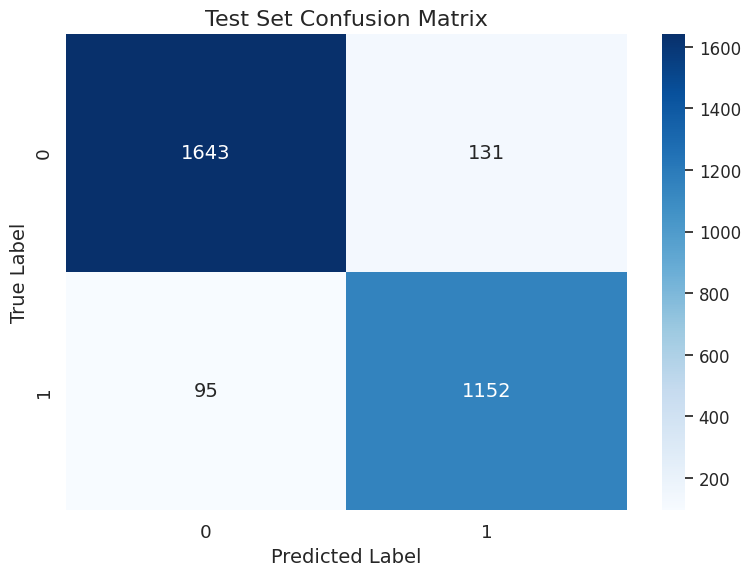

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))           
sns.set(font_scale=1.2)              

# Create heatmap
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                      xticklabels=target_names, yticklabels=target_names,
                      cbar=True, annot_kws={"size": 14})

# Axis labels
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Test Set Confusion Matrix', fontsize=16)

# Color bar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()
